In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..', '..')))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/crop_recommendation.csv")

In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [131]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'], dtype='object')

In [130]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'], dtype='object')

In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
crop            object
dtype: object

In [12]:
df.shape

(2200, 8)

In [13]:
df['crop'].value_counts()

crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# Explore Predictors vs Crops
Check how the crops interact with the different soil and environmental variables

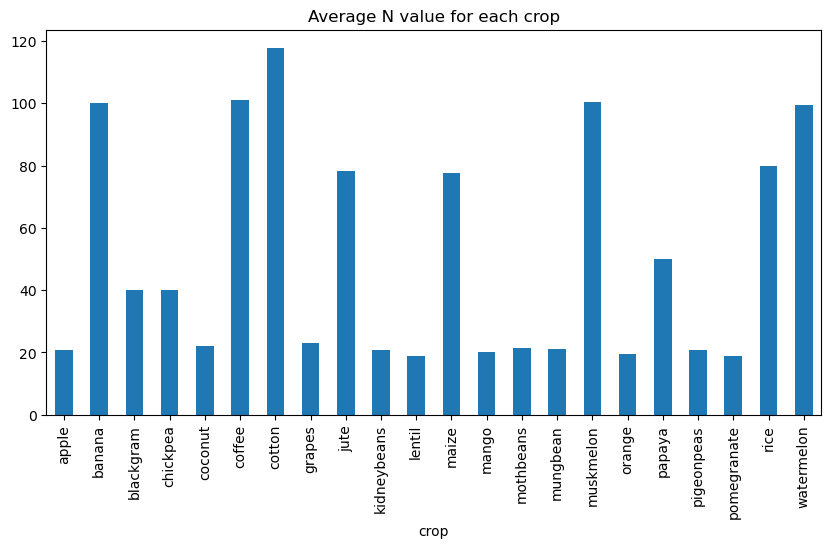

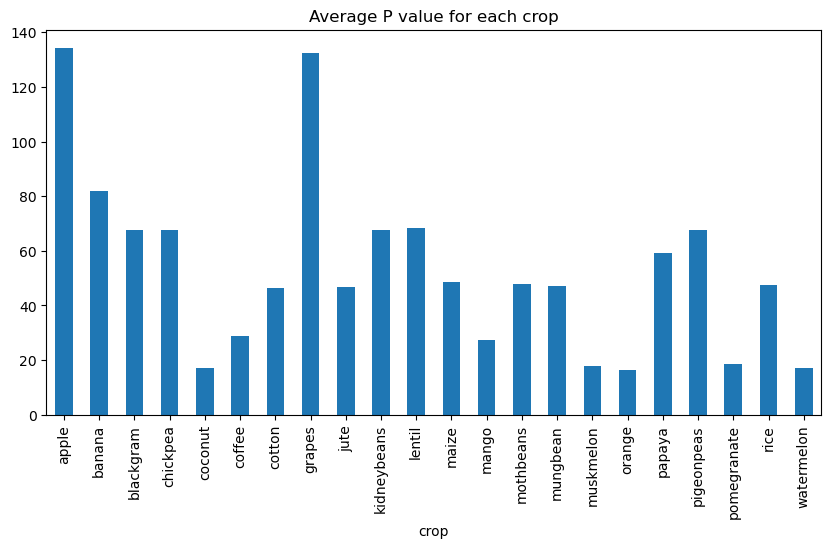

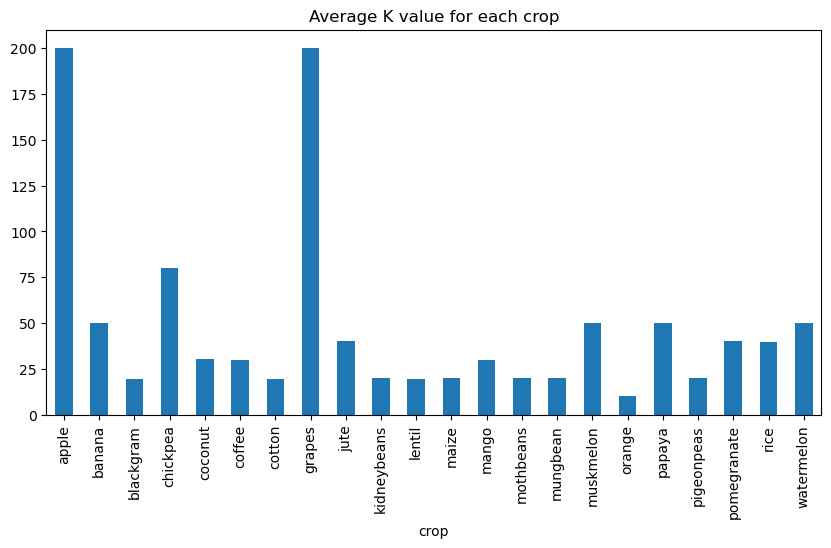

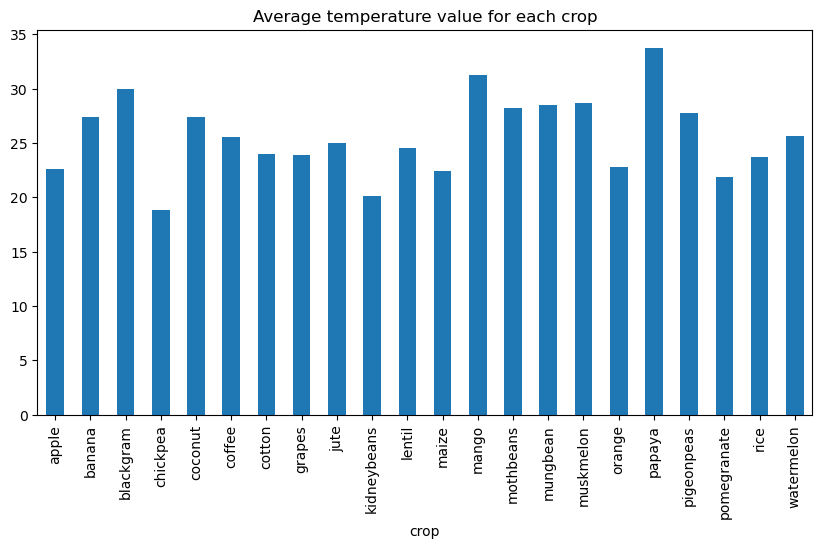

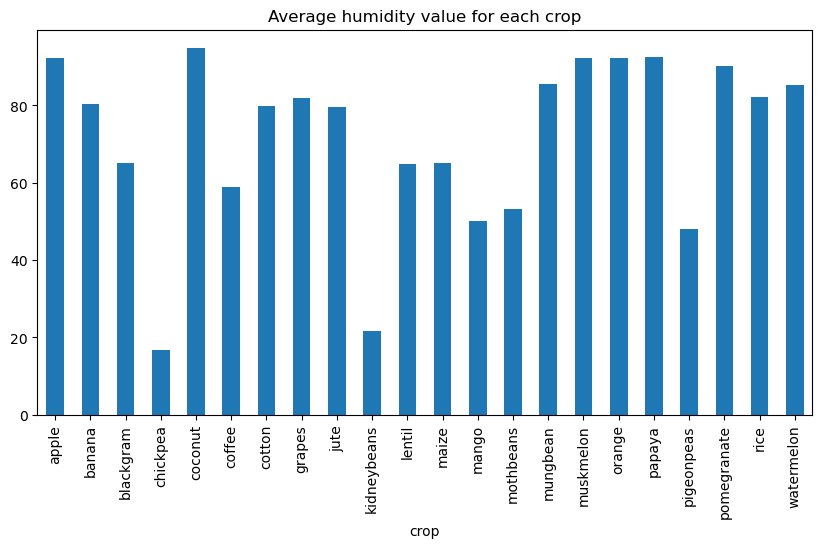

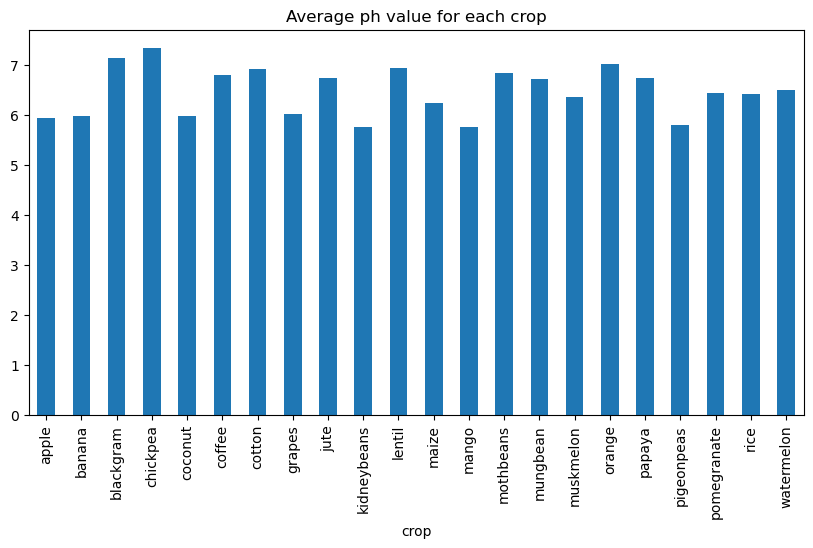

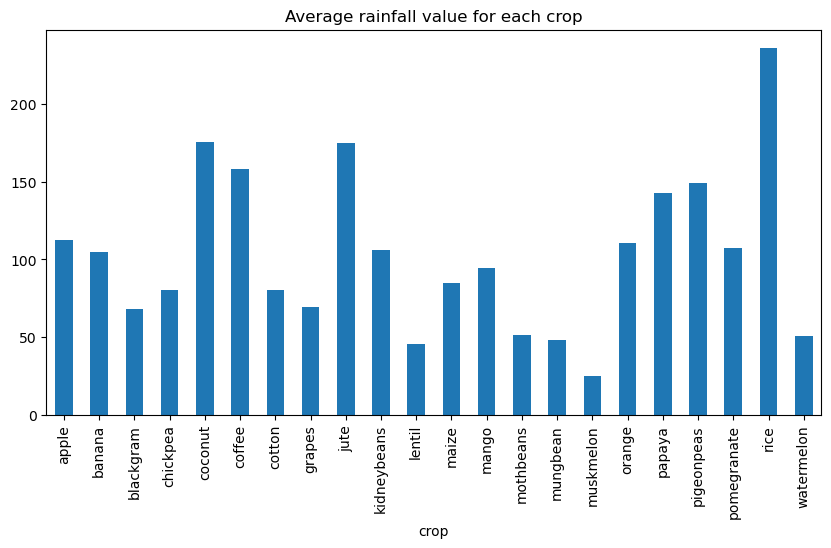

In [27]:
cols = df.columns.drop('crop')

for col in cols:
    df.groupby('crop')[col].mean().plot(kind='bar', figsize=(10, 5))
    plt.title(f"Average {col} value for each crop")
    plt.show()



# Do correlation 

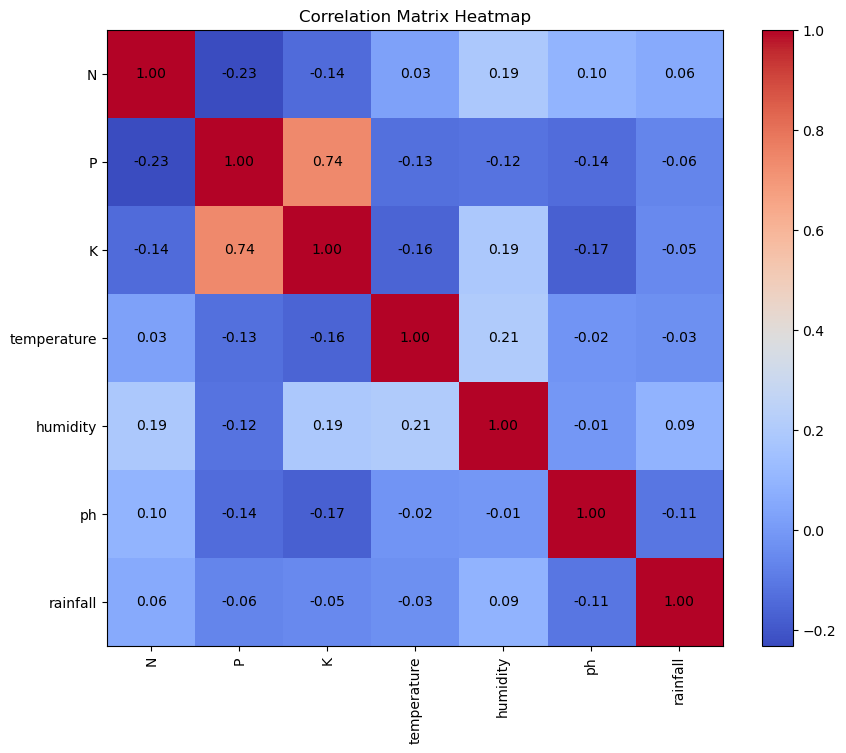

In [32]:
correlation_matrix = df.drop('crop', axis=1).corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()

There's a strong correlation between the Pottassium and Phosphorus

CHECK DATA DISTRIBUTION

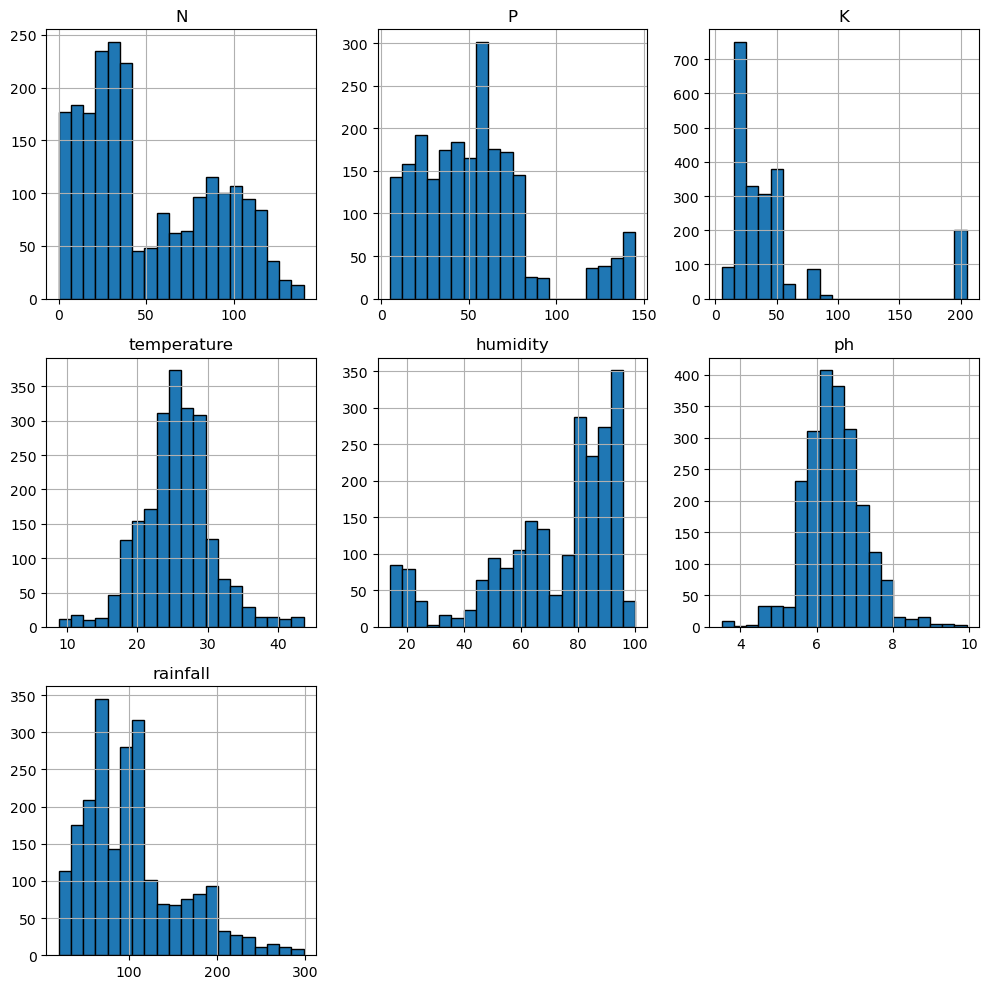

In [37]:
df.hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

Let's see it in numbers. The skewness of normal distribution will be close to 0.

In [38]:
cols = df.columns.drop('crop')

for col in cols:
    print(f"{col}_Skewness : {df[col].skew()}")
    print(f"{col}_Kurtosis : {df[col].kurtosis()}")

N_Skewness : 0.5097213691539147
N_Kurtosis : -1.0582398753148494
P_Skewness : 1.0107725431372674
P_Kurtosis : 0.8602787550148228
K_Skewness : 2.3751672388547
K_Kurtosis : 4.44935441896056
temperature_Skewness : 0.18493273421137887
temperature_Kurtosis : 1.2325548517558178
humidity_Skewness : -1.0917079195808679
humidity_Kurtosis : 0.3021340700925377
ph_Skewness : 0.2839294375729441
ph_Kurtosis : 1.6555814549345498
rainfall_Skewness : 0.9657563536272812
rainfall_Kurtosis : 0.6070792853156082


There will be a need to transoform the data to follow a normal distribution

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = np.log1p(df.drop('crop', axis=1))
df_scaled = scaler.fit_transform(df_scaled)

In [54]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns.drop('crop'))

Check the distribution of the scaled data

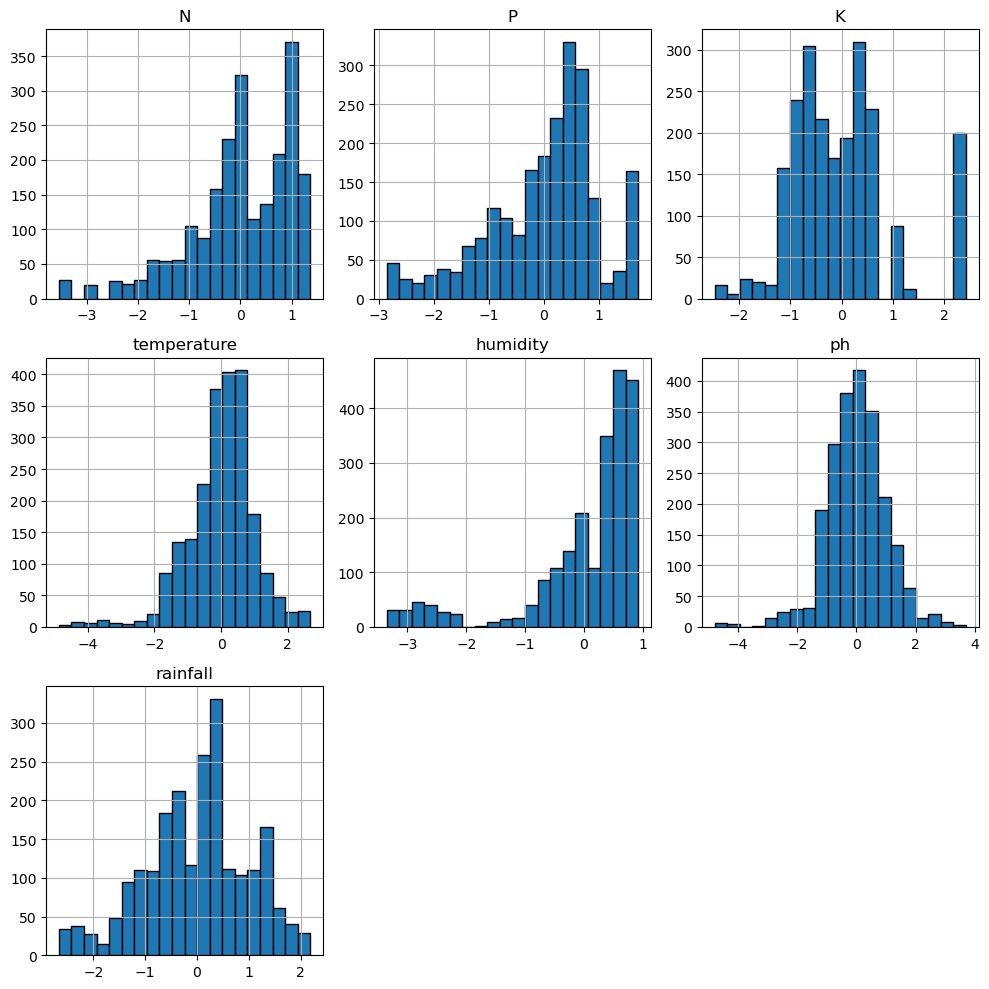

In [55]:
df_scaled.hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [56]:
cols = df_scaled.columns

for col in cols:
    print(f"{col}_Skewness : {df_scaled[col].skew()}")
    print(f"{col}_Kurtosis : {df_scaled[col].kurtosis()}")

N_Skewness : -1.0600021215665527
N_Kurtosis : 1.1639791834592876
P_Skewness : -0.7094076489362297
P_Kurtosis : 0.28426123662173763
K_Skewness : 0.8675940619509013
K_Kurtosis : 0.7284038719847432
temperature_Skewness : -0.8390513622089972
temperature_Kurtosis : 2.5617090624906536
humidity_Skewness : -1.8801418040151385
humidity_Kurtosis : 2.7998663421554064
ph_Skewness : -0.3025374405620989
ph_Kurtosis : 2.115283373991051
rainfall_Skewness : -0.30018624278440836
rainfall_Kurtosis : -0.17093633878034664


Scaling the data did not make the distribution better. I will proceed with modelling using the unscaled data.

# Modelling

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [68]:
# Split the data into train cross validation and test sets
# Encode the target variable
label_encoder = LabelEncoder()
df['crop'] = label_encoder.fit_transform(df['crop'])
X = df.drop('crop', axis=1)
y = df['crop']
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_training, y_training, test_size=0.25, random_state=42, stratify=y_training)


In [74]:
lr = LogisticRegression(max_iter=2000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
xgb_c = xgb.XGBClassifier()


In [76]:
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Support Vector Classifier': svc,
    'XGBoost': xgb_c
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_cv_pred = model.predict(X_cv)
    y_train_pred = model.predict(X_train)
    print(f"{name} - CV Accuracy: {model.score(X_cv, y_cv)}")
    print(f"{name} - Train Accuracy: {model.score(X_train, y_train)}")

/Users/meshachaderele/miniconda3/envs/mlenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - CV Accuracy: 0.9681818181818181
Logistic Regression - Train Accuracy: 0.9931818181818182
Decision Tree - CV Accuracy: 0.9863636363636363
Decision Tree - Train Accuracy: 1.0
Random Forest - CV Accuracy: 0.9931818181818182
Random Forest - Train Accuracy: 1.0
Gradient Boosting - CV Accuracy: 0.9931818181818182
Gradient Boosting - Train Accuracy: 1.0
Support Vector Classifier - CV Accuracy: 0.9727272727272728
Support Vector Classifier - Train Accuracy: 0.975
XGBoost - CV Accuracy: 0.990909090909091
XGBoost - Train Accuracy: 1.0


To be sure that the model is not overfitting, I want to explore the XGBOOST, RANDOMEFOREST and LOGISTIC REGRESSION better

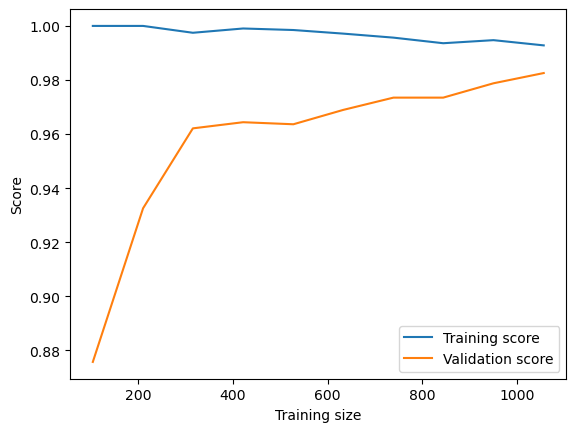

In [78]:
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

train_sizes, train_scores, val_scores = learning_curve(lr, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.title('Learning curve for Logistic Regression')
plt.legend()
plt.show()

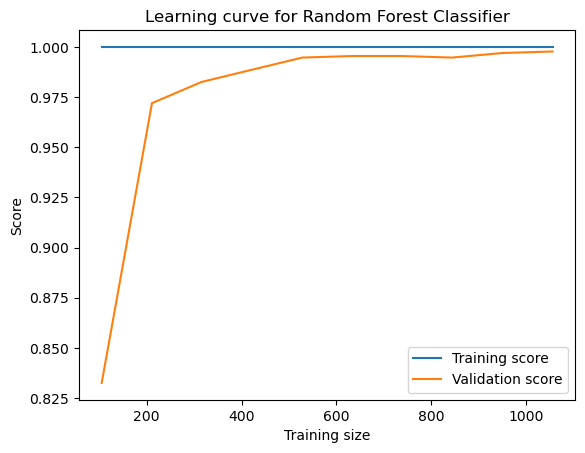

In [79]:
train_sizes, train_scores, val_scores = learning_curve(rf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.title('Learning curve for Random Forest Classifier')
plt.legend()
plt.show()

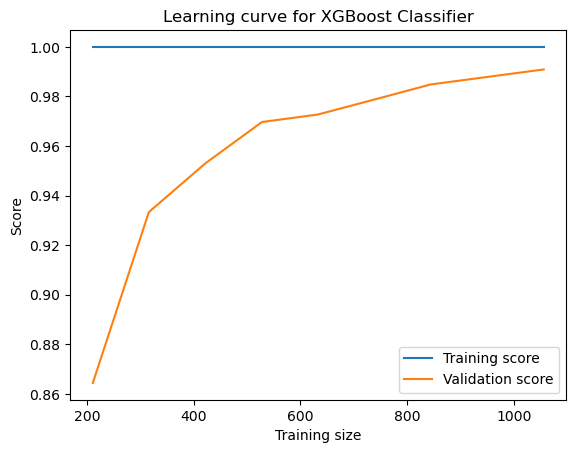

In [80]:
train_sizes, train_scores, val_scores = learning_curve(xgb_c, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.title('Learning curve for XGBoost Classifier')
plt.legend()
plt.show()

Random Forest Classifier: Consistently high training score (1.0) with validation score improving and closely converging. Shows strong generalization and a good fit.

Logistic Regression : Training score starts high but slightly decreases as training size grows, with validation score improving and converging closely. Indicates a balanced, well-generalized fit with reduced overfitting risk.

XGBoost Classifier: Training score is perfect (1.0), but validation score, though improving, lags behind. Shows slight overfitting, requiring tuning to improve generalization.

I will recommend Logistic Regression because of the the reduced overfitting risk.

In [81]:
final_model = lr.fit(X_train, y_train)

In [83]:
y_cv_pred = final_model.predict(X_cv)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_cv, y_cv_pred)
conf_matrix = confusion_matrix(y_cv, y_cv_pred)
precision = precision_score(y_cv, y_cv_pred, average='weighted')
recall = recall_score(y_cv, y_cv_pred, average='weighted')
f1 = f1_score(y_cv, y_cv_pred, average='weighted')

# Print metrics
print(f"CV Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\n")

CV Accuracy: 0.9681818181818181
Confusion Matrix:
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  2  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 16  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0 

# Pack The Final Model and Save

In [99]:
import pickle

class FullPipelineWithDecoder:
    def __init__(self, model, label_encoder):
        self.model = model
        self.label_encoder = label_encoder

    def predict(self, X):
        y_pred_encoded = self.model.predict(X)
        return self.label_encoder.inverse_transform(y_pred_encoded)
    
    def predict_encoded(self, X):
        y_pred_encoded = self.model.predict(X)
        return y_pred_encoded

    def predict_probability(self, X):
        return self.model.predict_proba(X)

full_pipeline = FullPipelineWithDecoder(final_model, label_encoder)

with open("../models/final_lr_model.pkl", "wb") as file:
    pickle.dump(full_pipeline, file)

In [100]:
full_pipeline.predict(X_test.iloc[0:1])

array(['orange'], dtype=object)

In [101]:
full_pipeline.predict_encoded(X_test.iloc[0:1])

array([16])

In [102]:
print(y_test.iloc[0])

16


In [111]:
X_test = X_test.reset_index(drop=True)
X_test['id'] = X_test.index
X_test = X_test[['id'] + [col for col in X_test.columns if col != 'id']]
X_test.head()

,id,N,P,K,temperature,humidity,ph,rainfall
0,0,13,23,6,23.961476,90.264080,7.365338,102.695870
1,1,98,79,50,25.341198,84.473213,6.435917,91.064934
2,2,140,38,15,24.147295,75.882986,6.021440,69.915635
3,3,71,54,16,22.613600,63.690706,5.749914,87.759539
4,4,40,22,6,24.536101,91.909972,6.488221,115.978799


In [114]:
y_test = y_test.reset_index(drop=True)
y_test = pd.DataFrame(y_test, columns=['crop'])
y_test['id'] = y_test.index
y_test = y_test[['id', 'crop']]
y_test.head()

,id,crop
0,0,16
1,1,1
2,2,6
3,3,11
4,4,16


In [115]:
X_test.to_csv("../data/test.csv", index=False)

0    16
1     1
2     6
3    11
4    16
Name: crop, dtype: object